# Imports and Custom Functions

In [42]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import set_config
set_config(transform_output = 'pandas')
# Supress Warnings, https://www.geeksforgeeks.org/how-to-disable-python-warnings/
import warnings
warnings.filterwarnings('ignore') 

In [26]:
# Import the data

df = pd.read_csv("Data/cust_seg.csv")
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [27]:
df.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


## Preprocess the Data

In [28]:
# Drop unnamed column
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [29]:
df.set_index("Customer Id", inplace = True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [30]:
# Check for duplicates
df.duplicated().sum()

0

In [31]:
# Check for NaNs
df.isna().sum().sum()

150

In [14]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

I would ask a subject matter expert about how to handle the missing Default values. I am going to fill with 0s.

In [34]:
df = df.fillna(0)

In [35]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [ ]:
# Scale the Data

In [36]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507


# KMeans

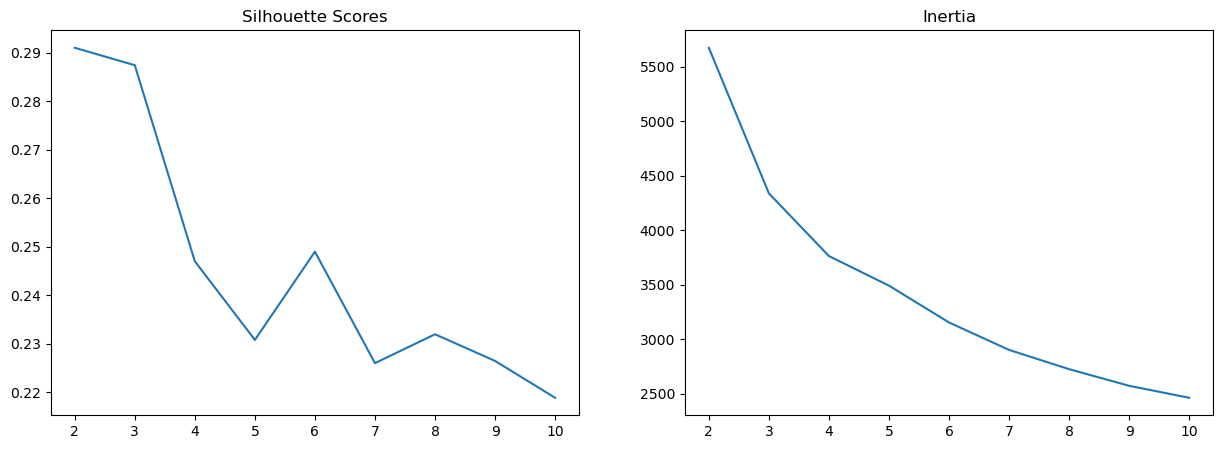

In [39]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

I am going to choose 3 as my number of clusters based on the inertia and silhouette scores but I will test 4 as well. 4 ended up clustering better on the graphs so I went with 4 clusters.

# Cluster Analysis

In [51]:
# Refit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, n_init= 'auto', random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,2
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,1
4,29,2,4,19,0.681,0.516,0.0,6.3,2
5,47,1,31,253,9.308,8.908,0.0,7.2,3


In [52]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups


,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,41.473214,1.611607,15.825893,70.620536,1.821911,3.950906,0.008929,9.206696
1,1,31.840491,1.871166,3.963190,31.552147,1.589816,2.780276,0.993865,13.867485
2,2,31.918465,1.645084,5.520384,30.419664,0.765312,1.670046,0.000000,8.248681
3,3,43.152174,2.217391,17.130435,131.021739,7.693783,12.660000,0.413043,19.206522


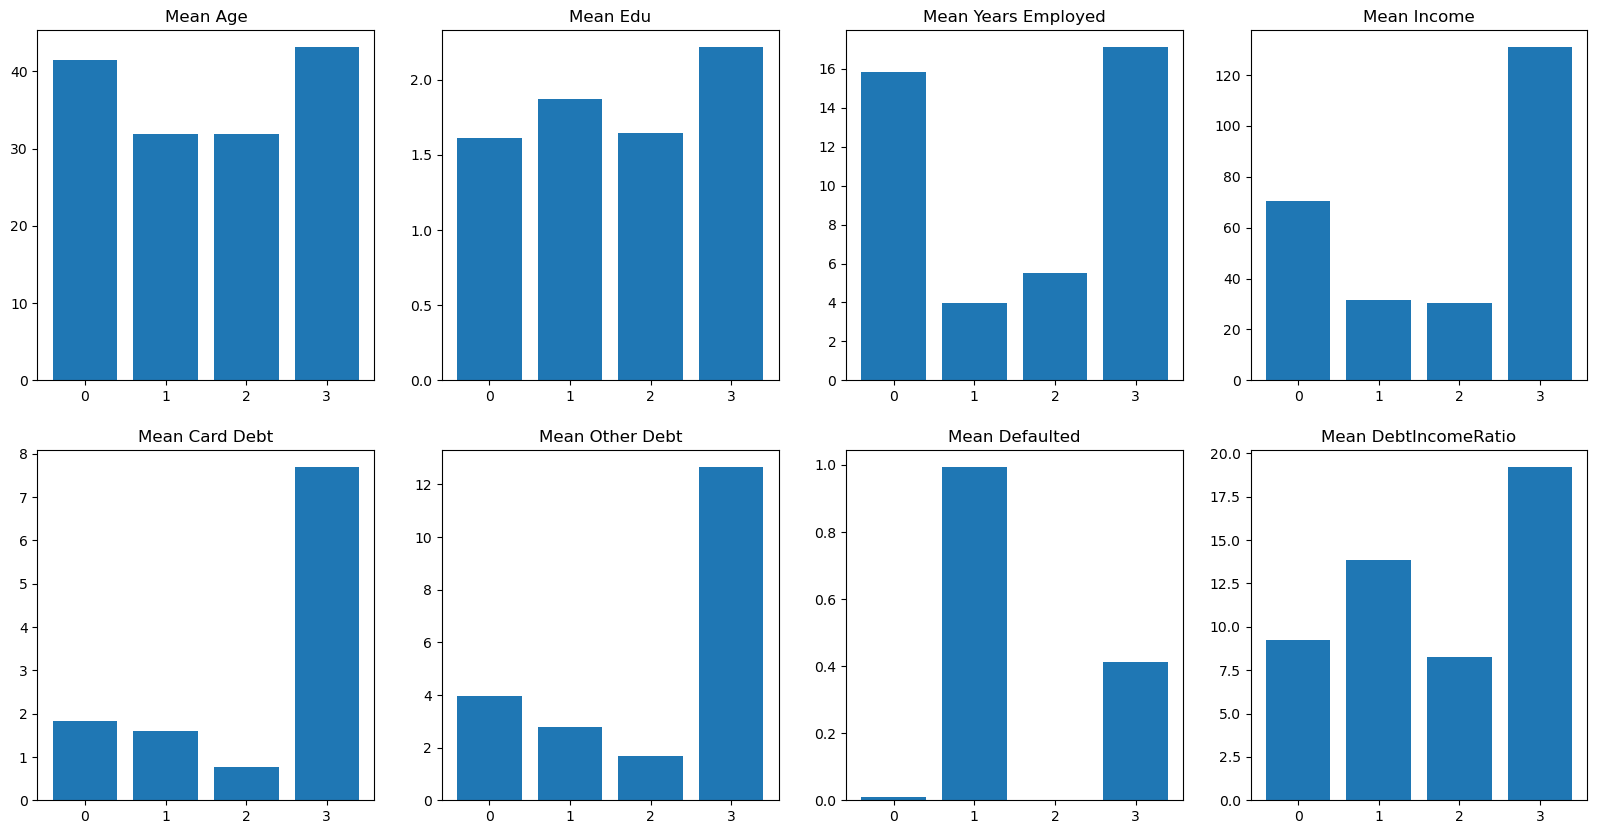

In [53]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')



# Cluster Descriptions

0. Cluster 0 appears to be an older, more fiscally responsible group that might save more money on the whole. They have been employed for a relatively long time and have a moderate income, moderate debt, no defaults, and a lower debt-to-income ratio.
1. Cluster 1 is a relatively younger group that has been employed for a far shorter time and has a much lower income, but debt is comparable to Cluster 0. They also have almost all defaulted at some point and have a higher debt-to-income ratio. This group seems to spend a lot of money, possibly more than they make, and be less fiscally responsible overall.
2. Cluster 2 is similarly aged to Cluster 1 but appears to be very fiscally responsible, with lower income but also low debt and no defaults.
3. Cluster 3 represents the most extreme group. They make more money and spend more money than any other group. They have a lot of debt, are the most educated, and have been employed for a long time, but also have a high default rate and a very high debt-to-income ratio.


# Recommendations

Create one or two recommendations for your stakeholders (the credit card company) regarding how they should market credit cards differently or which cards they should market to each cluster based on your data and insights.

The credit card company should market cash back or other "savings" cards to clusters 0 and 2. These customers seem to be more debt wary and fiscally responsible overall. Low-interest cards may also be a good marketing tactic for this group.

Cluster 1 and 3 might respond well to cards with great rates/deals on balance transfers as they tend to already have higher levels of debt.